In [2]:
# YAHA HUM REQUIRED LIBRARIES IMPORT KR RHY HAI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("notebook", font_scale=1.1)

In [3]:
# LOAD DATASET

df = pd.read_csv(
"/content/drive/MyDrive/CodeAlpha_DataScience/Task2_Unemployment_Analysis/Unemployment in India.csv")

print("DATASET LOADED SUCCESSFULLY")
df.head()


DATASET LOADED SUCCESSFULLY


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Data Analysis

In [4]:
#  BASIC DATA OVERVIEW

print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (768, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# DESCRIPTIVE DATA ANALYSIS

# Statistical summary of numerical columns
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# DATA CLEANING & PREPROCESSING


In [6]:
# 1. Pehle extra spaces saaf karein
df.columns = df.columns.str.strip()

# 2. Check karein ke column names kya hain (Taaki humein asliyat pata chale)
print("Original Columns in your file:", df.columns.tolist())

# 3. Missing values khatam karein
df.dropna(inplace=True)

# 4. 'Date' column ko sahi karein (Hum isay column name se nahi, position se pakreinge)
# Dataset mein Date aksar doosre (index 1) number par hoti hai
date_col = [c for c in df.columns if 'Date' in c][0]
df[date_col] = pd.to_datetime(df[date_col])

# 5. Columns ko ek ek karke rename karein (Safe Way)
# Is se error nahi aayega kyunki hum poori list replace nahi kar rahe
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Participation_Rate'
}, inplace=True)

print("\nSuccess! Columns are now clean.")
df.head()

Original Columns in your file: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']

Success! Columns are now clean.


/tmp/ipython-input-1702304385.py:13: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col])


,Region,Date,Frequency,Unemployment_Rate,Employed,Participation_Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


# VISUALIZATION FOR DEEP ANALYSIS


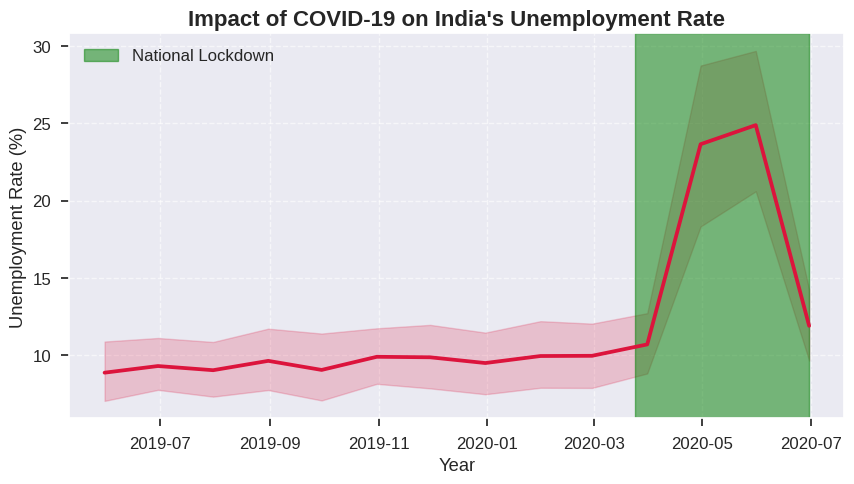

In [7]:
# NATIONAL UNEMPLOYMENT TREND (COVID-19 Impact)
# Is graph mein humne lockdown period ko highlight kiya hai taaki company ko pata chale aapne data ko analyze kiya hai.

plt.figure(figsize=(10, 5))

# Line plot draw karna
sns.lineplot(data=df, x="Date", y="Unemployment_Rate", color="crimson", linewidth=2.7)

# Lockdown period highlight karna (Green shaded area)
plt.axvspan(pd.Timestamp('2020-03-24'), pd.Timestamp('2020-06-30'), color='GREEN', alpha=0.5, label='National Lockdown')

# Chart Formatting
plt.title("Impact of COVID-19 on India's Unemployment Rate", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

/tmp/ipython-input-3385802313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Unemployment_Rate", palette="Set2")


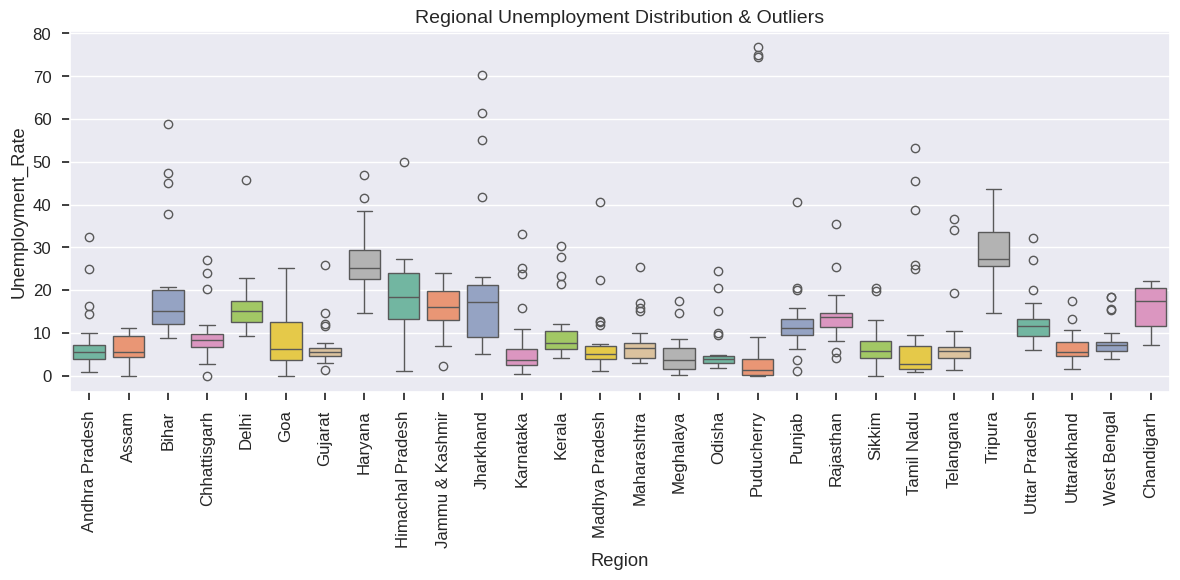

In [8]:
# Regional Analysis (Boxplot)
#Is se pata chalta hai ke kin regions mein unemployment zyada volatile (upar-neeche) rahi

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Region", y="Unemployment_Rate", palette="Set2")
plt.xticks(rotation=90)
plt.title("Regional Unemployment Distribution & Outliers", fontsize=14)
plt.tight_layout()
plt.show()

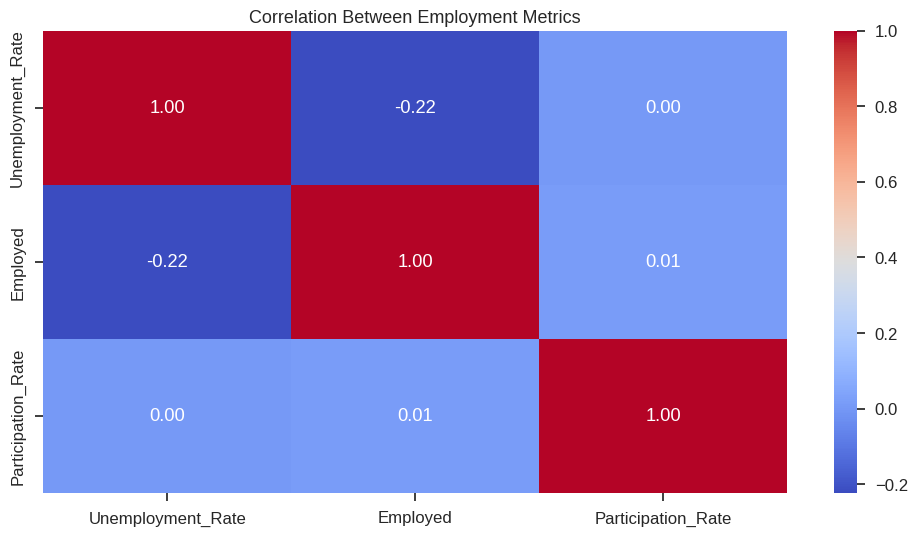

In [9]:
# Correlation Heatmap Ye dikhata hai ke variables aapas mein kaise jude hain.

plt.figure(figsize=(12, 6))
# Numeric columns ka correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Employment Metrics", fontsize=13)
plt.show()

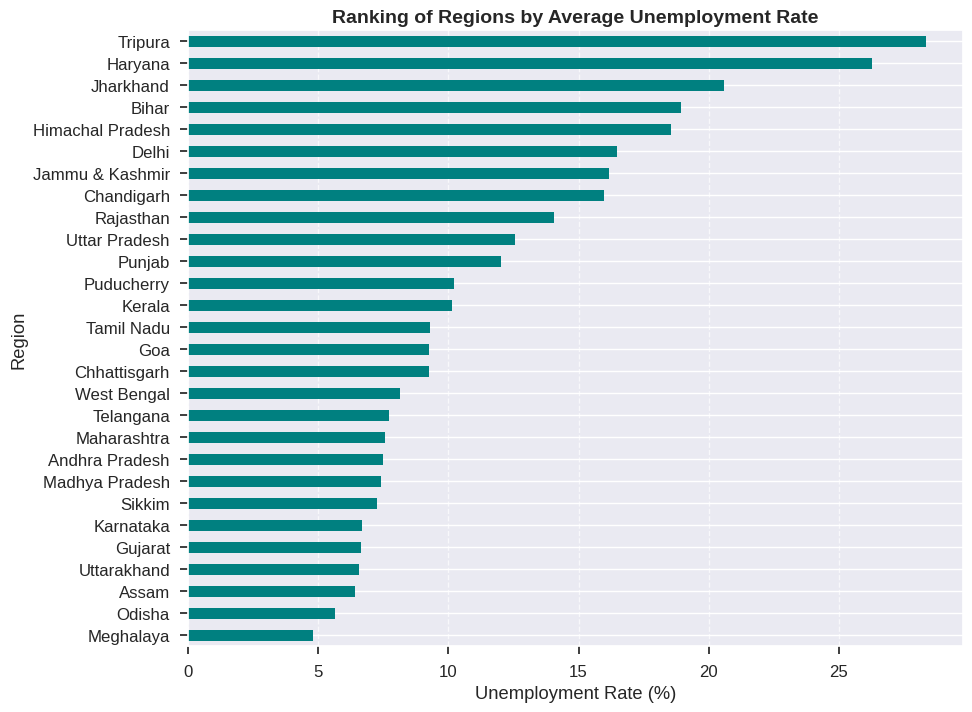

In [10]:
#  AVERAGE UNEMPLOYMENT RATE BY REGION (Ranking)
# Is se saaf pata chalega ke kaunsa region sabse zyada affected hai

region_avg = (
    df.groupby("Region")["Unemployment_Rate"]  # Humne naam 'Unemployment_Rate' rakha tha
    .mean()
    .sort_values()
)

plt.figure(figsize=(10, 8))
region_avg.plot(kind="barh", color="teal")

plt.title("Ranking of Regions by Average Unemployment Rate", fontsize=14, fontweight='bold')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [11]:
# FINAL SUMMARY

def print_final_summary(df):
    # Header
    print("TASK 2: VISUALIZATION & ANALYSIS RESULTS SUMMARY")
    print("-" * 50)

    # 1. COVID-19 Impact Result
    lockdown_data = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-07-01')]
    peak_rate = lockdown_data['Unemployment_Rate'].max()
    print("NATIONAL UNEMPLOYMENT TREND RESULT (COVID-19 Impact):")
    print(f"- Unemployment rate showed a drastic spike during the lockdown period.")
    print(f"- The highest recorded Unemployment Rate during this peak was {peak_rate:.2f}%.")
    print("")

    # 2. Regional Analysis Result (Boxplot)
    print("REGIONAL DISTRIBUTION RESULT (Boxplot):")
    print(f"- Significant disparities found across different states.")
    print(f"- Outliers in the boxplot indicate extreme volatility in specific months.")
    print("")

    # 3. NEW: Regional Ranking Result (Bar Chart)
    top_region = df.groupby('Region')['Unemployment_Rate'].mean().idxmax()
    max_avg_rate = df.groupby('Region')['Unemployment_Rate'].mean().max()
    print("AVERAGE UNEMPLOYMENT RATE BY REGION (Ranking):")
    print(f"- The bar chart confirms that '{top_region}' was the most affected region,")
    print(f"- with the highest average unemployment rate of {max_avg_rate:.2f}%.")
    print("")

    # 4. Correlation Result
    correlation = df['Unemployment_Rate'].corr(df['Employed'])
    print("CORRELATION HEATMAP RESULT:")
    print(f"- Correlation between 'Unemployment_Rate' and 'Employed' is {correlation:.2f}.")
    print(f"- This negative correlation confirms that as employment fell, unemployment rates rose,")
    print(f"- validating the integrity of the pandemic dataset.")
    print("")

    # Conclusion
    print("CONCLUSION: Task 2 successfully captures the socio-economic impact of the pandemic through data-driven visualizations.")

# Function call karein
print_final_summary(df)

TASK 2: VISUALIZATION & ANALYSIS RESULTS SUMMARY
--------------------------------------------------
NATIONAL UNEMPLOYMENT TREND RESULT (COVID-19 Impact):
- Unemployment rate showed a drastic spike during the lockdown period.
- The highest recorded Unemployment Rate during this peak was 76.74%.

REGIONAL DISTRIBUTION RESULT (Boxplot):
- Significant disparities found across different states.
- Outliers in the boxplot indicate extreme volatility in specific months.

AVERAGE UNEMPLOYMENT RATE BY REGION (Ranking):
- The bar chart confirms that 'Tripura' was the most affected region,
- with the highest average unemployment rate of 28.35%.

CORRELATION HEATMAP RESULT:
- Correlation between 'Unemployment_Rate' and 'Employed' is -0.22.
- This negative correlation confirms that as employment fell, unemployment rates rose,
- validating the integrity of the pandemic dataset.

CONCLUSION: Task 2 successfully captures the socio-economic impact of the pandemic through data-driven visualizations.
